In [1]:
%load_ext autoreload
%autoreload 2
from script.feature_extractor import FeatureExtractor
from script.classifier import Classifier
from script.signal_manager import SignalMgr
from script.filter import Filter
from script.data_reader import DataReader
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
INVALID_DATA_FPATH='/Volumes/workspace/projects/signal_classification/data/特殊次品样本/长短.20190515/'
FULL_DATA_FAPTH='/Volumes/workspace/projects/signal_classification/data/1005_0830重新标注文件_Data._20180609.0830'
MISS_VALID_POSSIBILITY_FPATH=''

In [3]:
data_reader = DataReader()

In [4]:
# long-short dataframe 长短波 波形文件
ls_df = data_reader.get_signal_list(INVALID_DATA_FPATH).drop(labels=['sys_result'], axis=1)
ls_df['expect_result'] = 1
ls_df['reason'] = 4
ls_df.describe()

,channel_id,expect_result,reason
count,656.000000,656.0,656.0
mean,4.500000,1.0,4.0
std,2.293036,0.0,0.0
min,1.000000,1.0,4.0
25%,2.750000,1.0,4.0
50%,4.500000,1.0,4.0
75%,6.250000,1.0,4.0
max,8.000000,1.0,4.0


In [5]:
norm_df = data_reader.create_single_index(FULL_DATA_FAPTH+'/'+'result.csv').drop(labels='sys_result', axis=1)
norm_df[norm_df.reason==4].describe()
norm_df.head()

,case_name,channel_id,case_path,expect_result,reason
0,20180325_090536,1,/Volumes/workspace/projects/signal_classificat...,0,-1
1,20180325_090637,1,/Volumes/workspace/projects/signal_classificat...,1,9
2,20180325_091016,1,/Volumes/workspace/projects/signal_classificat...,1,5
3,20180325_091047,1,/Volumes/workspace/projects/signal_classificat...,1,5
4,20180325_091103,1,/Volumes/workspace/projects/signal_classificat...,1,5


/Volumes/workspace/projects/signal_classification/data/特殊次品样本/长短.20190515/20190515_195250029/Channel_2.csv


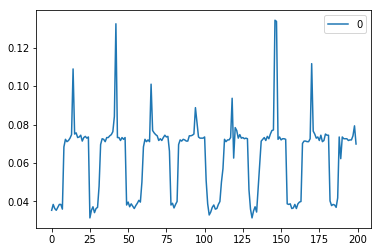

In [6]:
# 长短波 case 分析
ls_df.head(1)
path1 = ls_df.loc[ls_df.index ==0, 'case_path'][0]
path2 = ls_df['case_path'][1]
print (path2)
import pandas as pd
signals = pd.read_csv(path1, skiprows=1, header=None)
signals[0:200].plot()

In [8]:
sigMgr = SignalMgr()
feature = sigMgr.get_features(path1, request_param={'skip_row':[1], 'model_path':['train']})

In [10]:
print (feature['paired_edges'])

[((2, 8), (19, 25)), ((30, 36), (43, 49)), ((58, 65), (72, 78)), ((77, 83), (95, 104)), ((107, 117), (123, 129)), ((129, 141), (148, 154)), ((163, 164), (176, 182)), ((186, 189), (199, 207)), ((213, 217), (229, 235)), ((239, 241), (252, 258)), ((266, 273), (280, 286)), ((286, 292), (304, 310)), ((320, 327), (333, 339)), ((343, 345), (356, 362)), ((371, 373), (384, 390)), ((390, 396), (408, 414)), ((419, 429), (436, 448)), ((447, 455), (460, 469)), ((475, 477), (488, 494)), ((494, 500), (512, 518)), ((525, 535), (541, 546)), ((552, 559), (565, 571)), ((578, 586), (593, 599)), ((599, 611), (616, 622)), ((630, 634), (645, 651)), ((651, 662), (669, 675)), ((683, 690), (697, 703)), ((703, 709), (721, 727)), ((735, 744), (749, 761)), ((760, 762), (773, 779)), ((787, 795), (801, 807)), ((807, 813), (825, 831)), ((840, 848), (854, 865)), ((864, 872), (878, 884)), ((892, 894), (907, 912)), ((912, 924), (930, 935)), ((944, 952), (958, 964)), ((964, 970), (982, 988)), ((996, 1004), (1010, 1016))]

In [93]:
print (feature['unit_interviene_length'])
print (np.mean(feature['unit_interviene_length_diff']))
print (np.std(feature['unit_interviene_length_diff']))

[5, 9, 1, 3, 0, 9, 4, 6, 4, 8, 0, 10, 4, 9, 0, 5, 1, 6, 0, 7, 6, 7, 0, 8, 0, 8, 0, 8, 1, 8, 0, 9, 1, 8, 0, 9, 0, 8]
6.297297297297297
2.491768772241321


In [94]:
feature1 = sigMgr.get_features(path2, request_param={'skip_row':[1], 'model_path':['train']})
print (feature1['unit_interviene_length'])
print (np.mean(feature1['unit_interviene_length_diff']))
print (np.std(feature1['unit_interviene_length_diff']))


[4, 9, 4, 11, 4, 11, 0, 10, 5, 12, 4, 9, 5, 10, 4, 10, 4, 11, 4, 11, 1, 13, 4, 11, 4, 8, 5, 8, 5, 10, 4, 11, 4]
6.5
2.165063509461097


[7, 9, 8, 8, 6, 7, 7, 7, 7, 8, 7, 7, 8, 8, 7, 8, 7, 8, 7, 7, 7, 8, 7, 7, 8, 7, 7, 8, 7, 8, 7, 7, 7, 8]
0.696969696969697
0.5765544724375893


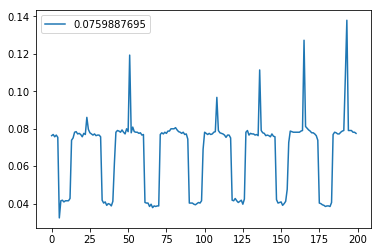

In [271]:
path3 = norm_df.loc[norm_df.expect_result == 0, 'case_path'].reset_index(drop=True)[3]
feature1 = sigMgr.get_features(path3, request_param={'skip_row':[1], 'model_path':['train']})
print (feature1['unit_interviene_length'])
print (np.mean(feature1['unit_interviene_length_diff']))
print (np.std(feature1['unit_interviene_length_diff']))
signals = pd.read_csv(path3, skiprows=1)
signals[0:200].plot()

In [136]:
# 开始进行模型迭代和训练, 整合训练数据和测试数据

def data_prepare(train_path, test_path, ls_eval_path):
    # 预留长短波形的数据用于数据的测试
    msk = np.random.rand(len(ls_df)) < 0.8
    ls_train_df = ls_df[msk]         #用于训练
    ls_eval_df = ls_df[~msk]         #用于最后验证

    # 获取整体的训练数据
    train_mix_df = ls_train_df.append(norm_df).reset_index(drop=True)
    # 再次划分为测试集合与训练集合
    msk = np.random.rand(len(train_mix_df)) < 0.8
    train_df = train_mix_df[msk]
    test_df = train_mix_df[~msk]

    # pandas 写入到文件中进行缓存，用于迭代测试，避免出现每次划分数据集合auc发生变化
    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)
    ls_eval_df.to_csv(ls_eval_path, index=False)

In [137]:
# data_prepare("../data/train.csv", "../data/test.csv", "../data/ls_eval.csv")

In [138]:
data_root = '../data'
# 开始进行特征的获取
train_df = pd.read_csv(data_root + '/' + 'train.csv')

In [144]:
normal_cases = train_df[train_df.expect_result == 0]
other_defect_cases = train_df[(train_df.expect_result == 1) & (train_df.reason != 4)]
ls_defet_cases = train_df[train_df.reason == 4]

In [156]:
def get_features(df):
    mu_list = []
    delta_list = []
    sigMgr = SignalMgr()
    for path in df['case_path']:
        feature = sigMgr.get_features(path, request_param={'skip_row':[1], 'model_path':['train']})
        mu_list.append(np.mean(feature['unit_interviene_length_diff']))
        delta_list.append(np.std(feature['unit_interviene_length_diff']))
    return np.min(mu_list), np.max(mu_list), np.min(delta_list), np.max(delta_list), np.mean(mu_list), np.mean(delta_list)

In [158]:
get_features(ls_defet_cases)

(1.5142857142857142,
 14.678571428571429,
 0.667499479816693,
 10.401134253051444,
 6.414035941709297,
 2.46692449606582)

In [160]:
get_features(other_defect_cases)

(0.3333333333333333,
 68.375,
 0.42008402520840293,
 46.7598585861848,
 1.9585845324621511,
 1.6011336822038003)

In [161]:
get_features(normal_cases)

(0.3103448275862069,
 5.580645161290323,
 0.3263736246748184,
 4.490920545605185,
 1.4342385090125982,
 1.0206247140737066)

In [210]:
# 整体数据的区分很大，因此介入进行数据分析和训练

feature_names = ['peaks_num', 'down_peaks_num', 'up_edges_num', 'down_edges_num', 'peak_edge_ratio', 'down_peak_edge_ratio',
                 'edge_diff_10', 'edge_diff_20', 'width_diff_10', 'negative_peak_num', 'max_down_peak_point']
                
def features(df_full, feature_names):
    pathes = df_full['case_path']
    # print pathes
    feature_set = dict()
    for name in feature_names:
        feature_set[name] = list()
    feature_set['inter_diff_mean'] = list()
    feature_set['inter_diff_delta'] = list()
    
    for test_case in pathes:
        features = sigMgr.get_features(test_case, request_param={'skip_row':[1], 'model_path':['train']})
        for name in feature_names:
            feature_set[name].append(features[name])
        feature_set['inter_diff_mean'].append(np.mean(features['unit_interviene_length_diff']))
        feature_set['inter_diff_delta'].append(np.std(features['unit_interviene_length_diff']))
    
    return pd.DataFrame(feature_set)

In [211]:
train_x = features(train_df, feature_names)
train_y = train_df['expect_result']

In [212]:
test_df = pd.read_csv(data_root + '/' + 'test.csv')
test_x = features(test_df, feature_names)
test_y = test_df['expect_result']

/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [215]:
train_y[train_y == -1] = 0
test_y[test_y == -1] = 0

/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/changkong/anaconda3/envs/tpy2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
test_x = test_x.fillna(0)

In [220]:
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import classification_report

adaModel = ada(n_estimators=200, learning_rate = 0.5, random_state=10)
adaModel.fit(train_x, train_y)
pResult = adaModel.predict(test_x)
# possiblities = adaModel.predict_proba(test_x)
# pResult = [int(p0 < p1 + 0.011) for p0, p1 in possiblities]
# pResult = possiblities.where(possiblities >= 0.6, 1, 0)
print(classification_report(test_y, pResult))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       632
           1       0.94      0.93      0.94      1030

   micro avg       0.92      0.92      0.92      1662
   macro avg       0.92      0.92      0.92      1662
weighted avg       0.92      0.92      0.92      1662



In [221]:
from sklearn.ensemble import GradientBoostingClassifier

gdbtModel = GradientBoostingClassifier()
gdbtModel.fit(train_x, train_y)
pResult = gdbtModel.predict(test_x)
print(classification_report(test_y, pResult))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       632
           1       0.94      0.94      0.94      1030

   micro avg       0.93      0.93      0.93      1662
   macro avg       0.92      0.92      0.92      1662
weighted avg       0.93      0.93      0.93      1662



In [222]:
ls_eval_df = pd.read_csv(data_root + '/' + 'ls_eval.csv')
ls_eval_x = features(ls_eval_df, feature_names)
ls_eval_y = ls_eval_df['expect_result']

pResult = gdbtModel.predict(ls_eval_x)
print(classification_report(ls_eval_y, pResult))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00       123

   micro avg       0.99      0.99      0.99       123
   macro avg       0.50      0.50      0.50       123
weighted avg       1.00      0.99      1.00       123



In [1]:
# 开始斜边的波形调研，先看用现有的基线能得到多好的测试结果
SKEW_DATA_FPATH='/Volumes/workspace/projects/signal_classification/data/特殊次品样本/斜角_严重.20190515/'
data_reader = DataReader()
skew_angel_df = data_reader.get_signal_list(SKEW_DATA_FPATH)
skew_angel_df['expect_result'] = 1

NameError: name 'DataReader' is not defined

In [242]:
test_x = features(skew_angel_df, feature_names)
test_y = skew_angel_df['expect_result']

In [244]:
pResult = gdbtModel.predict(test_x)
print(classification_report(test_y, pResult))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       128

   micro avg       0.40      0.40      0.40       128
   macro avg       0.50      0.20      0.28       128
weighted avg       1.00      0.40      0.57       128



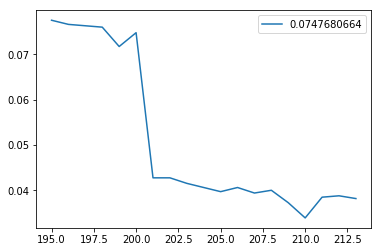

In [321]:
path = skew_angel_df.head()['case_path'][4]
signals = pd.read_csv(path, skiprows=1)
signals[195:214].plot()

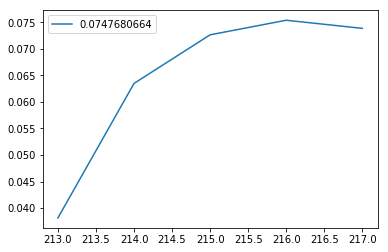

In [331]:
signals[213:218].plot()

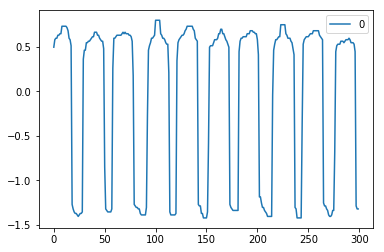

In [313]:
feas = sigMgr.get_features(path, request_param={'skip_row':[1], 'model_path':['train']})
normalized_signals = feas['normalized_signals'] 
medfiltered_signals = Filter.medfilter(normalized_signals, 9)
# pd.DataFrame(medfiltered_signals)[0:300].plot()

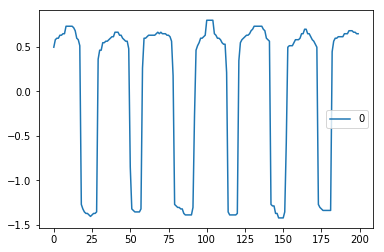

In [314]:
pd.DataFrame(medfiltered_signals)[0:200].plot()

In [322]:
feas['paired_edges']

[((28, 29), (48, 51)),
 ((57, 58), (76, 79)),
 ((90, 96), (112, 114)),
 ((120, 121), (138, 142)),
 ((146, 153), (172, 173)),
 ((181, 182), (199, 202)),
 ((214, 218), (234, 237)),
 ((238, 246), (260, 265)),
 ((273, 278), (295, 297)),
 ((305, 306), (321, 326)),
 ((338, 340), (357, 363)),
 ((367, 369), (384, 389)),
 ((399, 400), (415, 421)),
 ((428, 429), (445, 450)),
 ((461, 468), (484, 485)),
 ((486, 492), (508, 513)),
 ((517, 524), (538, 546)),
 ((552, 553), (570, 573)),
 ((585, 586), (606, 608)),
 ((615, 616), (630, 636)),
 ((641, 649), (664, 670)),
 ((675, 677), (693, 697)),
 ((709, 711), (726, 733)),
 ((738, 744), (754, 760)),
 ((769, 771), (785, 792)),
 ((799, 800), (817, 820)),
 ((832, 834), (853, 855)),
 ((861, 865), (878, 883)),
 ((893, 896), (910, 915)),
 ((922, 924), (941, 944)),
 ((955, 959), (973, 979)),
 ((985, 989), (1003, 1007))]

[0.1404958682471583,
 0.13392861212405086,
 0.11864405715739103,
 0.1090909752693668,
 0.09649117415631919,
 0.0916666472037649,
 0.07377053000128614,
 0.07017540809665362,
 0.0642201668051558,
 0.06194688697706604,
 0.05882351357865819,
 0.058823481912443555,
 0.05217386066866786,
 0.05128203373308394,
 0.043859611845226416,
 0.043103445895483365,
 0.04273507300701089,
 0.0413222615443611,
 0.03448275326483757,
 0.034482752074648446,
 0.03418806182765728,
 0.025862060634191778,
 0.0256409830847791,
 0.017543865502627095,
 0.01754381282108849,
 0.008849560500906179,
 0.008849542628212737,
 0.008771914882722031,
 0.008620709590843371,
 0.008547011179353603,
 7.48373219037784e-08,
 3.6398151738252885e-08,
 1.771591506217905e-08,
 0.0,
 0.0]

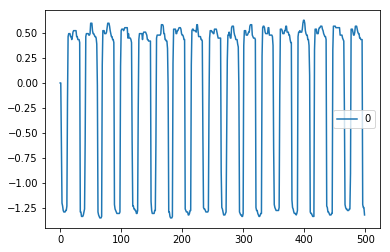

In [309]:
path = normal_cases['case_path'].reset_index(drop=True)[5]
feas = sigMgr.get_features(path, request_param={'skip_row':[1], 'model_path':['train']})
normalized_signals = feas['normalized_signals'] 
medfiltered_signals = Filter.medfilter(normalized_signals, 5)
pd.DataFrame(medfiltered_signals)[0:500].plot()
feas['paired_edge_height_diff']